In [1]:
%matplotlib inline
import pandas as pd
#import pandas.util.testing as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from os import walk
from tqdm import tqdm

## First reformat groups to simple repeat - Alu - satellite

In [2]:
with open('/home/mark/Desktop/chromosome_y/assemblies/repeatmasker/postMay232022/finalized/HG01106_finalized.txt') as f:
    Lines = f.readlines()
    
    AluFlag = 0
    aluEnd =0
    
    AluCasetteDict = {}
    group = 0
    AluCasetteDict[str(group)]=[]

    for line in tqdm(Lines): 
        
        goodLine = ' '.join(line.split())
            
        if AluFlag == 0:
            
            if goodLine.split(" ")[11] == 'SINE/Alu':
                aluEnd=int(goodLine.split(" ")[7].strip())
                AluCasetteDict[str(group)].append(goodLine)
                AluFlag+=1
                
            else:
                continue
                
        else:
            
            
            if int(goodLine.split(" ")[6])-int(aluEnd) < 4000:
                
                AluCasetteDict[str(group)].append(goodLine)

                if goodLine.split(" ")[11] == 'SINE/Alu':
                    aluEnd=int(goodLine.split(" ")[7].strip())

                else:
                    continue
                    
            else:
                
                group+=1
                AluCasetteDict[str(group)]=[]

                if goodLine.split(" ")[11] == 'SINE/Alu':
                    aluEnd=int(goodLine.split(" ")[7].strip())
                    AluCasetteDict[str(group)].append(goodLine)

                else:
                    continue
                    

            
    
    
    f.close()

100%|█| 32711/32711 [00:00<0


In [3]:
AluCasetteDict

{'0': ['50690 1375 19.9 0.0 5.4 chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106 2855516 2855807 35343838 True AluY SINE/Alu 12 289 13 20914 True',
  '50691 3922 10.2 0.0 0.0 chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106 2855807 2856374 35343271 True HSATI Satellite 0 568 1 20915 False',
  '50692 415 24.7 3.9 3.4 chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106 2856382 2857935 35341710 False (TATATAA)n Simple_repeat 1 1561 0 20916 False',
  '50693 1435 18.8 0.0 5.4 chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106 2857936 2858227 35341418 True AluY SINE/Alu 12 289 13 20917 True',
  '50694 4050 9.3 0.0 0.0 chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106 2858227 2858794 35340851 True HSATI Satellite 0 568 1 20918 False',
  '50695 413 25.1 3.5 3.5 chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106 2858802 2860355 35339290 False (TATATAA)n Simple_repeat 1 1554 0 20919 False',
  '50696 1446 17.8 0.3 5.4 chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01

In [4]:
goodKeys = []
for x in AluCasetteDict.keys():
    if len(AluCasetteDict[x])>0:
        goodKeys.append(x)
        

goodAluGroupDict={}
tallyCount=0
for x in AluCasetteDict.keys():
    if x in goodKeys:
        goodAluGroupDict[tallyCount] = AluCasetteDict[x]
        tallyCount+=1
        continue
    else:
        continue

In [5]:
repeatBlocks = goodAluGroupDict.copy()

In [6]:
firstAlus = [repeatBlocks[x][0] for x in list(repeatBlocks.keys())[:-3]]
print(len(firstAlus))

41


In [7]:
lastAlus = []
for key in list(repeatBlocks.keys())[:-3]:
    lastAlu = 'temp'
    for repeat in repeatBlocks[key]:
        if 'SINE/Alu' in repeat:
            lastAlu=repeat
        else:
            continue
    lastAlus.append(lastAlu)
print(len(lastAlus))

41


In [8]:
LineNumbers = {'First':[], 'Last':[]}
with open('/home/mark/Desktop/chromosome_y/assemblies/repeatmasker/postMay232022/finalized/HG01106_finalized.txt') as f:
    Lines = f.readlines()
    
    lineNum = 0

    for line in tqdm(Lines): 
        
        goodLine = ' '.join(line.split())
        
        if goodLine.split(" ")[11] == 'SINE/Alu':
            if goodLine in firstAlus:
                LineNumbers['First'].append(str(goodLine)+" "+str(lineNum))
                lineNum+=1
            elif goodLine in lastAlus:
                LineNumbers['Last'].append(str(goodLine)+" "+str(lineNum))
                lineNum+=1
            else:
                lineNum+=1
                
        else:
            lineNum+=1

100%|█| 32711/32711 [00:00<0


In [9]:
new_repeatBlocks = {x:[] for x in list(repeatBlocks.keys())[:-3]}

In [10]:
with open('/home/mark/Desktop/chromosome_y/assemblies/repeatmasker/postMay232022/finalized/HG01106_finalized.txt') as f:
    Lines = f.readlines()
    

    groups = list(new_repeatBlocks.keys())
    groupNum = 0
    
    for group in groups:
        
        lineNum = 0
        for line in tqdm(Lines): 

            goodLine = ' '.join(line.split())

            if int(lineNum) == (int(LineNumbers['First'][groupNum].split(" ")[-1].strip())-1) and (int(LineNumbers['First'][groupNum].split(" ")[6].strip())-int(goodLine.split(" ")[7].strip())) <= 4000:
                new_repeatBlocks[group].append(goodLine)   
                lineNum+=1
            elif int(lineNum) >= int(LineNumbers['First'][groupNum].split(" ")[-1].strip()) and int(lineNum) <= int(LineNumbers['Last'][groupNum].split(" ")[-1].strip()):
                new_repeatBlocks[group].append(goodLine)
                lineNum+=1
            elif int(lineNum) == (int(LineNumbers['Last'][groupNum].split(" ")[-1].strip())+1) and (int(goodLine.split(" ")[6].strip()) - int(LineNumbers['Last'][groupNum].split(" ")[7].strip())) <= 4000:
                new_repeatBlocks[group].append(goodLine)
                lineNum+=1
            else:
                lineNum+=1
                                                                                                  
        groupNum+=1

100%|█| 32711/32711 [00:00<0
100%|█| 32711/32711 [00:00<0
100%|█| 32711/32711 [00:00<0
100%|█| 32711/32711 [00:00<0
100%|█| 32711/32711 [00:00<0
100%|█| 32711/32711 [00:00<0
100%|█| 32711/32711 [00:00<0
100%|█| 32711/32711 [00:00<0
100%|█| 32711/32711 [00:00<0
100%|█| 32711/32711 [00:00<0
100%|█| 32711/32711 [00:00<0
100%|█| 32711/32711 [00:00<0
100%|█| 32711/32711 [00:00<0
100%|█| 32711/32711 [00:00<0
100%|█| 32711/32711 [00:00<0
100%|█| 32711/32711 [00:00<0
100%|█| 32711/32711 [00:00<0
100%|█| 32711/32711 [00:00<0
100%|█| 32711/32711 [00:00<0
100%|█| 32711/32711 [00:00<0
100%|█| 32711/32711 [00:00<0
100%|█| 32711/32711 [00:00<0
100%|█| 32711/32711 [00:00<0
100%|█| 32711/32711 [00:00<0
100%|█| 32711/32711 [00:00<0
100%|█| 32711/32711 [00:00<0
100%|█| 32711/32711 [00:00<0
100%|█| 32711/32711 [00:00<0
100%|█| 32711/32711 [00:00<0
100%|█| 32711/32711 [00:00<0
100%|█| 32711/32711 [00:00<0
100%|█| 32711/32711 [00:00<0
100%|█| 32711/32711 [00:00<0
100%|█| 32711/32711 [00:00<0
100%|█| 32711/

In [11]:
for x in list(repeatBlocks.keys())[-3:]:
    new_repeatBlocks[x] = repeatBlocks[x] 

In [12]:
goodAluGroupDict = new_repeatBlocks.copy()

In [13]:
RepeatBlockLengths = []
for key in new_repeatBlocks.keys():
    RepeatBlockLengths.append((int(new_repeatBlocks[key][-1].split(" ")[7].strip())-int(new_repeatBlocks[key][0].split(" ")[6].strip()))+1)

In [14]:
#exportListDF = pd.DataFrame(data=RepeatBlockLengths, columns=['RepeatBlockLength'])
#exportListDF.to_csv("/home/mark/Desktop/chromosome_y/repeatBlockFiles/ListCSVs/HG01106_RepeatBlock.csv")

In [15]:
AllAlus = 0
for key in new_repeatBlocks.keys():
    totalAlus = 0
    for repeat in new_repeatBlocks[key]:
        if 'SINE/Alu' in repeat:
            totalAlus+=1
            AllAlus+=1
        else:
            continue
            
    print("Repeat Block: "+str(key))
    print("Total Alus: "+str(totalAlus))
print("All Alus: "+str(AllAlus))

Repeat Block: 0
Total Alus: 155
Repeat Block: 1
Total Alus: 105
Repeat Block: 2
Total Alus: 132
Repeat Block: 3
Total Alus: 89
Repeat Block: 4
Total Alus: 68
Repeat Block: 5
Total Alus: 178
Repeat Block: 6
Total Alus: 39
Repeat Block: 7
Total Alus: 493
Repeat Block: 8
Total Alus: 164
Repeat Block: 9
Total Alus: 89
Repeat Block: 10
Total Alus: 263
Repeat Block: 11
Total Alus: 389
Repeat Block: 12
Total Alus: 330
Repeat Block: 13
Total Alus: 67
Repeat Block: 14
Total Alus: 121
Repeat Block: 15
Total Alus: 106
Repeat Block: 16
Total Alus: 143
Repeat Block: 17
Total Alus: 239
Repeat Block: 18
Total Alus: 154
Repeat Block: 19
Total Alus: 76
Repeat Block: 20
Total Alus: 144
Repeat Block: 21
Total Alus: 169
Repeat Block: 22
Total Alus: 285
Repeat Block: 23
Total Alus: 161
Repeat Block: 24
Total Alus: 252
Repeat Block: 25
Total Alus: 44
Repeat Block: 26
Total Alus: 106
Repeat Block: 27
Total Alus: 117
Repeat Block: 28
Total Alus: 159
Repeat Block: 29
Total Alus: 349
Repeat Block: 30
Total Alus

In [16]:
#Export Blocks (Palmetto RegionBlocks)
#for key in new_repeatBlocks.keys():
#    with open("/home/mark/Desktop/chromosome_y/repeatBlockFiles/RepeatMaskSections/HG01106/HG01106_RepeatBlock_"+str(key)+'.txt', 'a+') as file:
#        for repeat in new_repeatBlocks[key]:
#            file.write(repeat+"\n")
#    file.close()

In [17]:
endBlockList = [str(x) for x in list(new_repeatBlocks.keys())[-3:]]

In [26]:
#This code makes one file with the coordinates of each Alu in each repeatblock
#with open("/home/mark/Desktop/chromosome_y/repeatBlockFiles/Alus/HG01106/HG01106_RepeatBlock_Alus.txt", 'a+') as file:
    for key in new_repeatBlocks.keys():
        for repeat in new_repeatBlocks[key]:
            if 'SINE/Alu' in repeat:
                if str(repeat.split(" ")[9]) == 'True':
                    if str(key) in endBlockList:
                        file.write("RepeatBlock "+str(key)+"\t"+str(repeat.split(" ")[5])+":"+str(repeat.split(" ")[6])+"-"+str(repeat.split(" ")[7])+"\t"+str('C_antisense')+"\t"+"GRAVEYARD"+"\n")
                    else:
                        file.write("RepeatBlock "+str(key)+"\t"+str(repeat.split(" ")[5])+":"+str(repeat.split(" ")[6])+"-"+str(repeat.split(" ")[7])+"\t"+str('C_antisense')+"\t"+"REPEATBLOCK"+"\n")
                else:
                    if str(key) in endBlockList:
                        file.write("RepeatBlock "+str(key)+"\t"+str(repeat.split(" ")[5])+":"+str(repeat.split(" ")[6])+"-"+str(repeat.split(" ")[7])+"\t"+str('+_sense')+"\t"+"GRAVEYARD"+"\n")

                    else:  
                        file.write("RepeatBlock "+str(key)+"\t"+str(repeat.split(" ")[5])+":"+str(repeat.split(" ")[6])+"-"+str(repeat.split(" ")[7])+"\t"+str('+_sense')+"\t"+"REPEATBLOCK"+"\n")

    file.close()

## Repeat Distribution

In [18]:
####################### WORKING ONE ###############################################################################

In [19]:
GroupSubBlock = {}

for key in goodAluGroupDict.keys():
    
    temporaryGroup = goodAluGroupDict[key].copy()

    
    #Initialize
    interGroup = []
    tempList = []
    first = 0
    second = 0
    switch = 'temp'
    flag=0
    check=0
    lastCheck=0

    groupCount = 0
    
    #Loop through Block
    for repeat in temporaryGroup:
        
        if repeat == temporaryGroup[-1]:
            tempList.append(repeat)
            interGroup.append(tempList)
            
        else:

            if switch == str(repeat.split(" ")[11].strip()) and lastCheck==1:
                tempList.append(repeat)
                switch = str(repeat.split(" ")[11].strip())
                lastCheck=1
                #continue

            elif lastCheck==1 and switch != str(repeat.split(" ")[11].strip()) and str(repeat.split(" ")[11].strip()) != 'SINE/Alu':
                interGroup.append(tempList)
                tempList = []
                tempList.append(repeat)
                switch = str(repeat.split(" ")[11].strip())
                first=1
                lastCheck=0
                second=0
                check=0
                flag=0

            elif lastCheck==1 and str(repeat.split(" ")[11].strip()) == 'SINE/Alu':
                interGroup.append(tempList)
                tempList = []
                tempList.append(repeat)
                lastCheck=0
                first=1
                second=0
                check=0
                flag=1


            ################# If there is no repeats in the group yet / New Group #############################

            else:

                if first==0:

                    if 'SINE/Alu' in repeat:
                        tempList = []
                        tempList.append(repeat)
                        first=1
                        second=0
                        flag=1

                    else:
                        tempList = []
                        tempList.append(repeat)
                        switch= str(repeat.split(" ")[11].strip())
                        first=1
                        second=0
                        flag=0
                        check=0

                ######################### If there is one repeat already ################################     

                elif first == 1 and second == 0:

                    if flag == 1:

                        if 'SINE/Alu' in repeat:
                            interGroup.append(tempList)

                            tempList = []
                            tempList.append(repeat)
                            second = 0
                            flag=1
                            first=1

                        else:

                            check=1
                            first=1
                            second=1
                            tempList.append(repeat)
                            switch = str(repeat.split(" ")[11].strip()) 


                    else:

                        if 'SINE/Alu' in repeat:
                            tempList.append(repeat)
                            first=1
                            second = 1
                            check=0

                        else:

                            if str(repeat.split(" ")[11].strip()) == switch:
                                tempList.append(repeat)
                                second=0
                                first=1
                                flag=0

                            else:
                                tempList = []
                                tempList.append(repeat)
                                switch= str(repeat.split(" ")[11].strip())
                                first=1
                                second=0
                                flag=0
                                check=0
                                #print("ERROR 1")
                                #print(key)
                                #print(tempList)
                                #print(repeat)


                elif first == 1 and second == 1:

                    if check == 1:

                        #If the third is the same append
                        if switch == str(repeat.split(" ")[11].strip()):
                            tempList.append(repeat)
                            first=1
                            second=0
                            flag=1
                            check=0

                        else:

                            #Start a new group
                            if 'SINE/Alu' in repeat:
                                interGroup.append(tempList)
                                tempList = []
                                tempList.append(repeat)
                                flag=1
                                check=0
                                first=1
                                second=0

                            else:
                                interGroup.append(tempList)
                                tempList = []
                                tempList.append(repeat)
                                switch = str(repeat.split(" ")[11].strip())
                                flag=0
                                first=1
                                check=0
                                second=0

                    else:

                        if 'SINE/Alu' in repeat:
                            interGroup.append(tempList)
                            tempList = []
                            tempList.append(repeat)
                            flag=1
                            first=1
                            check=0
                            second=0

                        else:

                            tempList.append(repeat)
                            switch = str(repeat.split(" ")[11].strip())
                            lastCheck=1

    
    GroupSubBlock[key]= []
    for listGroup in interGroup:
        GroupSubBlock[key].append(listGroup)

In [20]:
OrientationDict = {'True':'C', 'False':'+'}
repeatBlock_distList = []

for key in GroupSubBlock.keys():

    for group in GroupSubBlock[key]:
        #print(group)
        
        groupStart = int(group[0].split(" ")[6].strip())
        groupEnd = int(group[-1].split(" ")[7].strip())
        alu = 'temp'
        
        for repeat in group:
            if 'SINE/Alu' in repeat :
                alu = OrientationDict[str(repeat.split(" ")[9].strip())]+"_"+str(repeat.split(" ")[10].strip())+"_"+str(repeat.split(" ")[6].strip())+"-"+str(repeat.split(" ")[7].strip())
            else:
                continue
                
        repeatBlock_distList.append([int(key), alu, ((groupEnd-groupStart)+1), group])

In [21]:
repeatBlock_distList

[[0,
  'C_AluY_2855516-2855807',
  1608,
  ['50689 196 23.5 4.1 4.0 chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106 2854767 2855515 35344130 False (ATATATA)n Simple_repeat 1 750 0 20913 False',
   '50690 1375 19.9 0.0 5.4 chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106 2855516 2855807 35343838 True AluY SINE/Alu 12 289 13 20914 True',
   '50691 3922 10.2 0.0 0.0 chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106 2855807 2856374 35343271 True HSATI Satellite 0 568 1 20915 False']],
 [0,
  'C_AluY_2857936-2858227',
  2413,
  ['50692 415 24.7 3.9 3.4 chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106 2856382 2857935 35341710 False (TATATAA)n Simple_repeat 1 1561 0 20916 False',
   '50693 1435 18.8 0.0 5.4 chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106 2857936 2858227 35341418 True AluY SINE/Alu 12 289 13 20917 True',
   '50694 4050 9.3 0.0 0.0 chrY.21-24.01.AMPL7-PAR2.FW.unassigned-0000976.HG01106 2858227 2858794 35340851 True HSATI Satellite 0 568 1 20918 Fa

In [22]:
import json
#with open('/home/mark/Desktop/chromosome_y/json_dict/HG01106_cluster.json', 'w') as fp:
#    json.dump(GroupSubBlock, fp)

In [23]:
rb_df = pd.DataFrame(data=repeatBlock_distList, columns=['RepeatBlock','Alu','Lengths','Group'])

In [24]:
#Make sure not to keep all rows as some are "graveyard" blocks (last 3 Repeat Blocks)
rb_df

,RepeatBlock,Alu,Lengths,Group
0,0,C_AluY_2855516-2855807,1608,[50689 196 23.5 4.1 4.0 chrY.21-24.01.AMPL7-PA...
1,0,C_AluY_2857936-2858227,2413,[50692 415 24.7 3.9 3.4 chrY.21-24.01.AMPL7-PA...
2,0,C_AluY_2860356-2860646,2412,[50695 413 25.1 3.5 3.5 chrY.21-24.01.AMPL7-PA...
3,0,C_AluY_2862775-2863065,2412,[50698 408 24.7 3.7 3.7 chrY.21-24.01.AMPL7-PA...
4,0,C_AluY_2865192-2865483,2411,[50701 408 25.1 3.4 3.8 chrY.21-24.01.AMPL7-PA...
...,...,...,...,...
6761,43,+_AluSx_37859386-37859718,555,[80620 2114 13.0 0.7 0.0 chrY.21-24.01.AMPL7-P...
6762,43,+_AluJb_37860846-37860996,1012,[80622 18 21.8 0.0 0.0 chrY.21-24.01.AMPL7-PAR...
6763,43,+_AluSp_37860997-37861294,298,[80624 2101 12.8 0.7 0.3 chrY.21-24.01.AMPL7-P...
6764,43,+_AluJb_37861295-37861454,772,[80625 1569 19.5 0.0 6.5 chrY.21-24.01.AMPL7-P...


In [25]:
endBlockList

['41', '42', '43']

In [40]:
#This code makes one file with the coordinates of each DYZ in each repeatblock
#with open("/home/mark/Desktop/chromosome_y/repeatBlockFiles/DYZ/HG01106/HG01106_RepeatBlock_DYZs.txt", 'a+') as file:
    for row in rb_df.index:
        if 'C_' in str(rb_df.at[row,'Alu']):
            
            if str(rb_df.at[row,'RepeatBlock']) in endBlockList:
                file.write("RepeatBlock "+str(rb_df.at[row,'RepeatBlock'])+"\t"+str(rb_df.at[row,'Group'][0].split(" ")[5])+":"+str(rb_df.at[row,'Group'][0].split(" ")[6])+"-"+str(rb_df.at[row,'Group'][-1].split(" ")[7])+"\t"+str('C_antisense')+"\t"+"GRAVEYARD"+"\n")

            else:
                file.write("RepeatBlock "+str(rb_df.at[row,'RepeatBlock'])+"\t"+str(rb_df.at[row,'Group'][0].split(" ")[5])+":"+str(rb_df.at[row,'Group'][0].split(" ")[6])+"-"+str(rb_df.at[row,'Group'][-1].split(" ")[7])+"\t"+str('C_antisense')+"\t"+"REPEATBLOCK"+"\n")

        else:
            if str(rb_df.at[row,'RepeatBlock']) in endBlockList:
                file.write("RepeatBlock "+str(rb_df.at[row,'RepeatBlock'])+"\t"+str(rb_df.at[row,'Group'][0].split(" ")[5])+":"+str(rb_df.at[row,'Group'][0].split(" ")[6])+"-"+str(rb_df.at[row,'Group'][-1].split(" ")[7])+"\t"+str('+_sense')+"\t"+"GRAVEYARD"+"\n")

            else:
                file.write("RepeatBlock "+str(rb_df.at[row,'RepeatBlock'])+"\t"+str(rb_df.at[row,'Group'][0].split(" ")[5])+":"+str(rb_df.at[row,'Group'][0].split(" ")[6])+"-"+str(rb_df.at[row,'Group'][-1].split(" ")[7])+"\t"+str('+_sense')+"\t"+"REPEATBLOCK"+"\n")

    file.close()

In [26]:
rb_df['Color'] = 'temp'
rb_df['Block_Size'] = 'temp'

for entry in rb_df.index:
    
    if rb_df.at[entry,'RepeatBlock'] > 40:
        
        if int(rb_df.at[entry,'Lengths']) <= 999:
            rb_df.at[entry,'Color'] = 'black'
            rb_df.at[entry,'Block_Size'] = '<999'

        elif int(rb_df.at[entry,'Lengths']) >= 1000 and int(rb_df.at[entry,'Lengths']) <= 1999:
            rb_df.at[entry,'Color'] = 'black'
            rb_df.at[entry,'Block_Size'] = '1000-1999'

        elif int(rb_df.at[entry,'Lengths']) >= 2000 and int(rb_df.at[entry,'Lengths']) <= 2999:
            rb_df.at[entry,'Color'] = 'black'
            rb_df.at[entry,'Block_Size'] = '2000-2999'

        elif int(rb_df.at[entry,'Lengths']) >= 3000 and int(rb_df.at[entry,'Lengths']) <= 3999:
            rb_df.at[entry,'Color'] = 'black'
            rb_df.at[entry,'Block_Size'] = '3000-3999'
        else:
            rb_df.at[entry,'Color'] = 'magenta'
        
    else:
    
    
        if int(rb_df.at[entry,'Lengths']) <= 999:
            rb_df.at[entry,'Color'] = '#073B4C'
            rb_df.at[entry,'Block_Size'] = '<999'

        elif int(rb_df.at[entry,'Lengths']) >= 1000 and int(rb_df.at[entry,'Lengths']) <= 1999:
            rb_df.at[entry,'Color'] = '#118AB2'
            rb_df.at[entry,'Block_Size'] = '1000-1999'

        elif int(rb_df.at[entry,'Lengths']) >= 2000 and int(rb_df.at[entry,'Lengths']) <= 2999:
            rb_df.at[entry,'Color'] = '#06D6A0'
            rb_df.at[entry,'Block_Size'] = '2000-2999'

        elif int(rb_df.at[entry,'Lengths']) >= 3000 and int(rb_df.at[entry,'Lengths']) <= 3999:
            rb_df.at[entry,'Color'] = '#FFD166'
            rb_df.at[entry,'Block_Size'] = '3000-3999'
        else:
            rb_df.at[entry,'Color'] = 'magenta'


In [28]:
#rb_df.to_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG01106/HG01106_rbDF.csv")

In [43]:
import collections
for x,y in collections.Counter(rb_df[rb_df['RepeatBlock']<41]['Color']).items():
    print(x)
    print(int(y)/len(rb_df[rb_df['RepeatBlock']<41]['Color']))

#118AB2
0.006564224973892287
#06D6A0
0.9892585409518126
#FFD166
0.0019394301059227211
#073B4C
0.0022378039683723706


## Look at satellites do quick stats

In [44]:
tmpSatellitesList=[]
tmpSatellitesLength=[]

import ast
for x in rb_df[rb_df['RepeatBlock']<41]['Group']:
    for repeat in x:
        if 'Satellite' in repeat:
            tmpSatellitesList.append(repeat.split(" ")[10].strip())
            tmpSatellitesLength.append((int(repeat.split(" ")[7].strip())-int(repeat.split(" ")[6].strip()))+1)

In [45]:
import collections
print(collections.Counter(tmpSatellitesList))
print("\n")
print(collections.Counter(tmpSatellitesLength))

Counter({'HSATI': 6691})


Counter({568: 6253, 567: 213, 569: 68, 564: 68, 563: 24, 562: 21, 566: 15, 570: 12, 560: 8, 134: 3, 439: 2, 559: 1, 437: 1, 565: 1, 513: 1})


In [40]:
#################################################################################

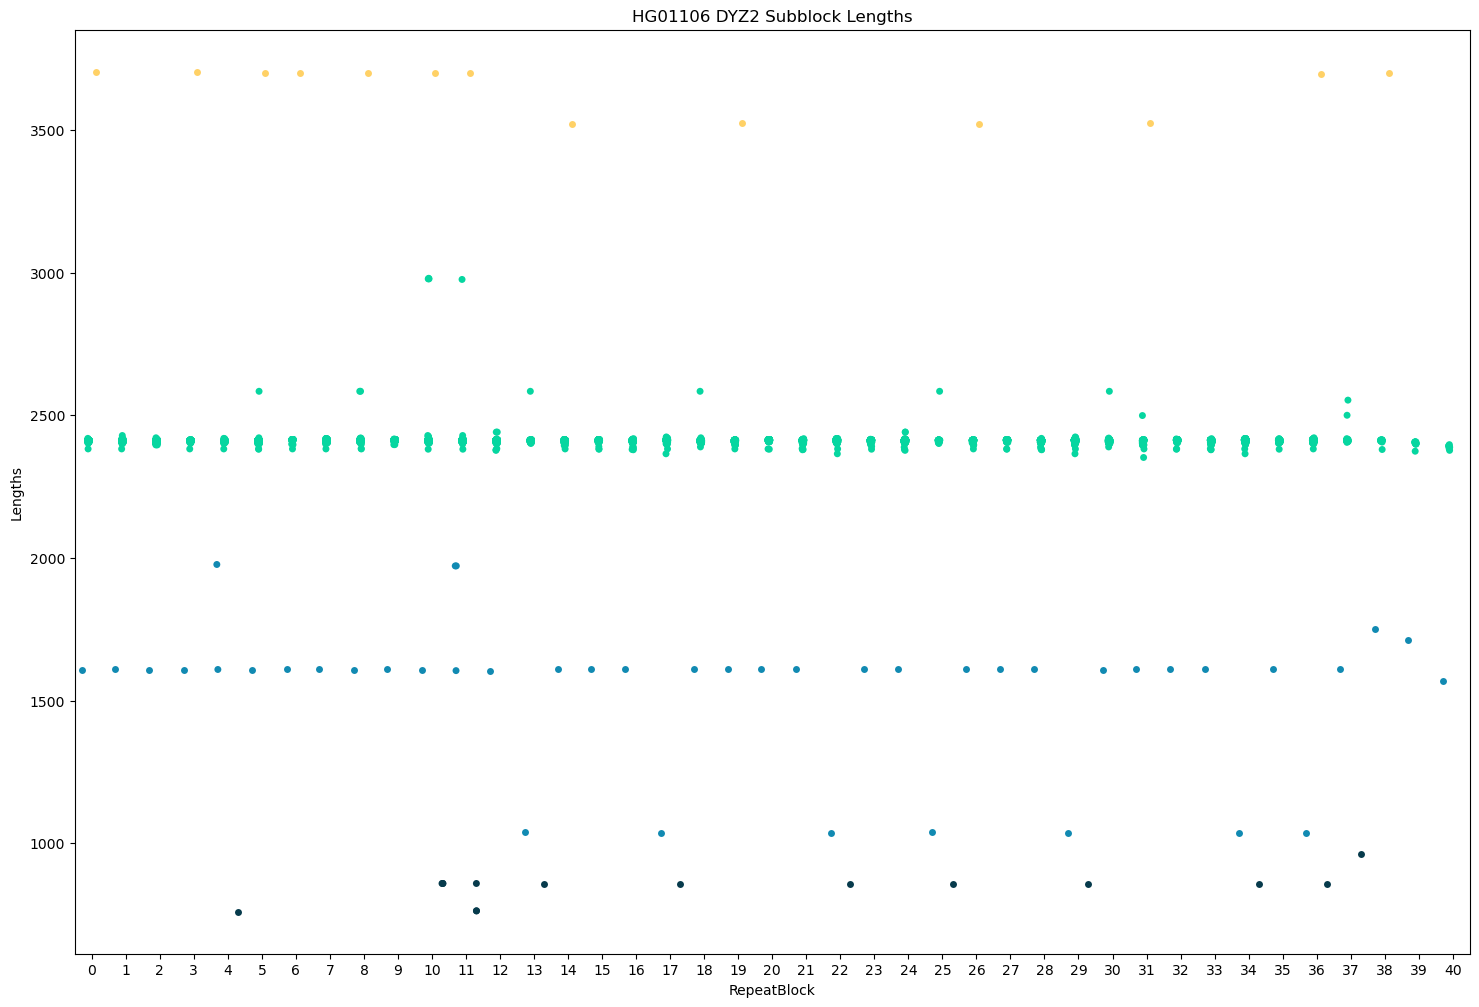

In [46]:
from matplotlib import rcParams
palette = {x:x for x in set(rb_df['Color'])}

plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 18,12
plt.title("HG01106 DYZ2 Subblock Lengths")
ax=sns.stripplot(x="RepeatBlock", y="Lengths", data=rb_df[rb_df['RepeatBlock']<41], hue='Color', palette=palette, dodge=True)
ax.get_legend().remove()
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/HG01106/HG01106_AluSubBlock_dots.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [47]:
temprbDF3 = rb_df[rb_df['RepeatBlock']<41].reset_index().set_index("RepeatBlock").copy()
heatDF = pd.DataFrame(index=set(temprbDF3.index), columns=set(temprbDF3['Color'])).fillna(0)
heatDF.index.name='RepeatBlock'
for block in set(temprbDF3.index):
    for key,value in dict(collections.Counter(temprbDF3.loc[block]['Color'])).items():
        #print(key)
        #print(value)
        heatDF.at[block,key]+= int(value)
heatDF.head()

,#06D6A0,#073B4C,#118AB2,#FFD166
RepeatBlock,,,,
0,153,0,1,1
1,104,0,1,0
2,131,0,1,0
3,87,0,1,1
4,65,1,2,0


In [48]:
heatDF2 = heatDF.div(heatDF.sum(axis=1), axis=0).copy()            
heatDF2.head()

,#06D6A0,#073B4C,#118AB2,#FFD166
RepeatBlock,,,,
0,0.987097,0.000000,0.006452,0.006452
1,0.990476,0.000000,0.009524,0.000000
2,0.992424,0.000000,0.007576,0.000000
3,0.977528,0.000000,0.011236,0.011236
4,0.955882,0.014706,0.029412,0.000000


In [49]:
heatDF_mInfo = pd.DataFrame(index=set(temprbDF3.index), columns=[str(o)+"_"+str(x)+"_"+str(y) for y in set(temprbDF3['Block_Size']) for x in set(temprbDF3['Color']) for o in ["C","+"]]).fillna(0)
heatDF_mInfo.index.name='RepeatBlock'
for block in set(temprbDF3.index):
    for alu in temprbDF3.loc[block].reset_index().index:
        #print(alu)
        heatDF_mInfo.at[block,str(temprbDF3.loc[block].reset_index().at[alu,'Alu'].split("_")[0].strip())+"_"+str(temprbDF3.loc[block].reset_index().at[alu,'Color'])+"_"+str(temprbDF3.loc[block].reset_index().at[alu,'Block_Size'])]+= 1
heatDF_mInfo.head()

,C_#06D6A0_<999,+_#06D6A0_<999,C_#073B4C_<999,+_#073B4C_<999,C_#118AB2_<999,+_#118AB2_<999,C_#FFD166_<999,+_#FFD166_<999,C_#06D6A0_2000-2999,+_#06D6A0_2000-2999,...,C_#FFD166_1000-1999,+_#FFD166_1000-1999,C_#06D6A0_3000-3999,+_#06D6A0_3000-3999,C_#073B4C_3000-3999,+_#073B4C_3000-3999,C_#118AB2_3000-3999,+_#118AB2_3000-3999,C_#FFD166_3000-3999,+_#FFD166_3000-3999
RepeatBlock,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,153,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,104,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,131,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,87,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,65,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
################################### BRAY-CURTIS DISTANCE ######################################

In [51]:
heatDF_mInfo2 = heatDF_mInfo.div(heatDF_mInfo.sum(axis=1), axis=0).copy()            
heatDF_mInfo2.head()
from scipy.spatial import distance
heatDF_mInfo3 = pd.DataFrame(index=heatDF_mInfo2.sort_index().index, columns=heatDF_mInfo2.sort_index().index).fillna(0.0)
for index in heatDF_mInfo3.index:
    for column in heatDF_mInfo3.columns:
        heatDF_mInfo3.at[index,column]= 1-float(distance.braycurtis(list(heatDF_mInfo.loc[index]), list(heatDF_mInfo.loc[column])))
heatDF_mInfo3.head()

RepeatBlock,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
RepeatBlock,,,,,,,,,,,,,,,,,,,,,
0,1.000000,0.807692,0.919861,0.729508,0.591928,0.930931,0.402062,0.475309,0.971787,0.729508,...,0.609865,0.919861,0.830189,0.524871,0.936170,0.728132,0.160428,0.148571,0.187135,0.098160
1,0.807692,1.000000,0.886076,0.907216,0.763006,0.742049,0.527778,0.351171,0.780669,0.917526,...,0.774566,0.886076,0.654206,0.390244,0.752688,0.557641,0.218978,0.208000,0.264463,0.141593
2,0.919861,0.886076,1.000000,0.796380,0.660000,0.851613,0.444444,0.422400,0.891892,0.805430,...,0.670000,1.000000,0.758621,0.467857,0.862745,0.655000,0.182927,0.171053,0.216216,0.114286
3,0.729508,0.907216,0.796380,1.000000,0.840764,0.666667,0.609375,0.302405,0.703557,0.988764,...,0.866242,0.796380,0.577049,0.336557,0.669202,0.492997,0.247934,0.238532,0.304762,0.164948
4,0.591928,0.763006,0.660000,0.840764,1.000000,0.536585,0.710280,0.235294,0.568966,0.840764,...,0.970588,0.660000,0.464789,0.266129,0.545455,0.392857,0.300000,0.295455,0.380952,0.210526


In [53]:
#heatDF_mInfo3.to_csv("/home/mark/Desktop/chromosome_y/repeatBlockFiles/Bray_Curtis_DataFrames/HG01106_BC.csv")

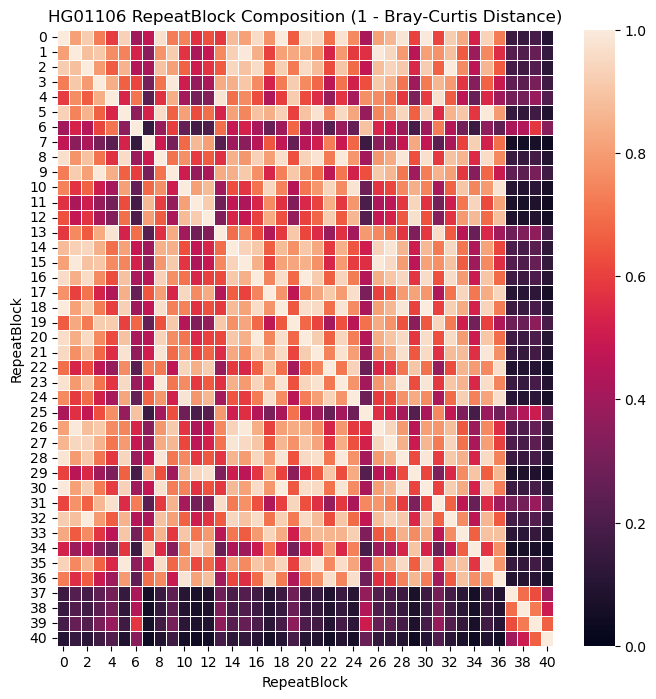

In [55]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 8,8
sns.heatmap(data=heatDF_mInfo3.sort_index(), linewidths=.7, annot=False, vmin=0)
plt.title("HG01106 RepeatBlock Composition (1 - Bray-Curtis Distance)")
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/HG01106/HG01106_BrayCurtis_Heatmap_0", dpi=300, bbox_inches='tight')
plt.show()

In [57]:
brayc = heatDF_mInfo3.sort_index().copy()
for rb in brayc.index:
    
    topHit=0.0
    bestBlock = 0
    flag=0
    
    for block in brayc.loc[rb]:
        
        if float(block) != 1.0 and float(block) >= topHit:
            
            topHit=float(block)
            bestBlock = list(brayc.loc[rb].index)[flag]
            
            flag+=1
            
        else:
            flag+=1

    print("Repeat Block: "+str(rb))
    print("Highest Correlated Block: "+str(bestBlock))
    print("1 - (Bray-Curtis Distance): "+str(topHit))
    print("\n")

Repeat Block: 0
Highest Correlated Block: 18
1 - (Bray-Curtis Distance): 0.9967637540453075


Repeat Block: 1
Highest Correlated Block: 26
1 - (Bray-Curtis Distance): 0.995260663507109


Repeat Block: 2
Highest Correlated Block: 16
1 - (Bray-Curtis Distance): 0.96


Repeat Block: 3
Highest Correlated Block: 9
1 - (Bray-Curtis Distance): 0.9887640449438202


Repeat Block: 4
Highest Correlated Block: 13
1 - (Bray-Curtis Distance): 0.9777777777777777


Repeat Block: 5
Highest Correlated Block: 35
1 - (Bray-Curtis Distance): 0.9886363636363636


Repeat Block: 6
Highest Correlated Block: 25
1 - (Bray-Curtis Distance): 0.891566265060241


Repeat Block: 7
Highest Correlated Block: 34
1 - (Bray-Curtis Distance): 0.9250814332247557


Repeat Block: 8
Highest Correlated Block: 23
1 - (Bray-Curtis Distance): 0.9907692307692307


Repeat Block: 9
Highest Correlated Block: 3
1 - (Bray-Curtis Distance): 0.9887640449438202


Repeat Block: 10
Highest Correlated Block: 36
1 - (Bray-Curtis Distance): 0.97

In [58]:
################################### VISUALIZE TREE ####################################################

In [59]:
#This code finds the total space between repeat blocks, 0 has 0 since there the space before it starts is not counted
repeatBlockList = list(goodAluGroupDict.keys())
print(repeatBlockList)
BlockListDistance = {x:0 for x in repeatBlockList}
start = 0
for block in repeatBlockList:
    if block == 0:
        continue
    else:
        BlockListDistance[block] = int(goodAluGroupDict[block][0].split(" ")[6].strip()) - int(goodAluGroupDict[repeatBlockList[start]][-1].split(" ")[7].strip()) 
        start+=1

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]


In [60]:
#This code prepares the Dataframe to give basic overview of region
for row in rb_df.index:
    if rb_df.at[row,'RepeatBlock']>=41:
        rb_df.at[row,'Color']='black'
    else:
        if 'C_' in str(rb_df.at[row,'Alu']):
            rb_df.at[row,'Color']='red'
        else:
            rb_df.at[row,'Color']='blue'

In [61]:
import turtle

In [71]:
list(set(rb_df['RepeatBlock']))[24:]

[24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43]

In [73]:
turtle.position()
turtle.color('black')
turtle.speed(0)
flag=1
groupFlag = 0
groupNames = list(goodAluGroupDict.keys())
lengthFlag = 0

startPosition = turtle.position()
turtle.color("white")
turtle.setposition(turtle.pos()[0], turtle.pos()[1]+300)
turtle.color("black")
turtle.write("HG01106 Yq Heterochromatin Repeat Blocks", align="Left")
turtle.color("white")
turtle.setposition(startPosition)

for key in tqdm(list(set(rb_df['RepeatBlock']))[24:]):
    
    totalAlus = len(rb_df[rb_df['RepeatBlock']==key])
        
    turtle.color("black")
    turtle.forward(75)
    currentPosition = turtle.position()
    

    if lengthFlag == 0:
        turtle.setposition(currentPosition)
    else:
        turtle.setposition(turtle.pos()[0]-10, turtle.pos()[1]+20)
        turtle.write(str(BlockListDistance[key]), align="right")
        turtle.setposition(currentPosition)

    currentPosition = turtle.position()
    if (flag % 2) == 0:
        turtle.setposition(turtle.pos()[0], turtle.pos()[1]-200)
    else:
        turtle.setposition(turtle.pos()[0], turtle.pos()[1]+200)
        
    turtle.write(" Repeat Block: "+str(key), align="left")

    turtle.setposition(currentPosition)
    

    groupFlag+=1
    lengthFlag+=1
    flag+=1
    
    tempDF = rb_df[rb_df['RepeatBlock']==key].copy() 
    for item in tempDF.index:
        
        if 'C_' in tempDF.at[item,'Alu']:
            turtle.color(tempDF.at[item,'Color'])
            turtle.forward(.5)
            turtle.right(90)
            turtle.forward(tempDF.at[item,'Lengths']/20)
            turtle.left(90)
            turtle.forward(1)
            turtle.left(90)
            turtle.forward(tempDF.at[item,'Lengths']/20)
            turtle.right(90)
            turtle.forward(.5)

        
        elif '+_' in tempDF.at[item,'Alu']:
            turtle.color(tempDF.at[item,'Color'])
            turtle.forward(.5)
            turtle.left(90)
            turtle.forward(tempDF.at[item,'Lengths']/20)
            turtle.right(90)
            turtle.forward(1)
            turtle.right(90)
            turtle.forward(tempDF.at[item,'Lengths']/20)
            turtle.left(90)
            turtle.forward(.5)

        
        else:
            turtle.color('black')
            turtle.forward(.5)


100%|███████████████████████████████████████████| 20/20 [04:49<00:00, 14.47s/it]


In [74]:
from PIL import Image

In [75]:
def save_as_png(canvas,fileName):
    # save postscipt image 
    canvas.postscript(file = fileName + '.eps') 
    # use PIL to convert to PNG 
    img = Image.open(fileName + '.eps') 
    img.save(fileName + '.png', 'png') 

In [76]:
ts = turtle.getscreen()
save_as_png(ts.getcanvas(),"/home/mark/Desktop/chromosome_y/Images/HG01106/HG01106_YqHeterochromatin_part2")

In [77]:
turtle.bye()

## Look at Sub Blocks

In [78]:
tempHolderList = []
for x,y in collections.Counter(temprbDF3['Lengths']).items():
    for i in range(0,y):
        tempHolderList.append(x)
    
tempDF = pd.DataFrame(data=tempHolderList, columns=['Length'])
tempDF.head()

,Length
0,1608
1,1608
2,1608
3,1608
4,1608


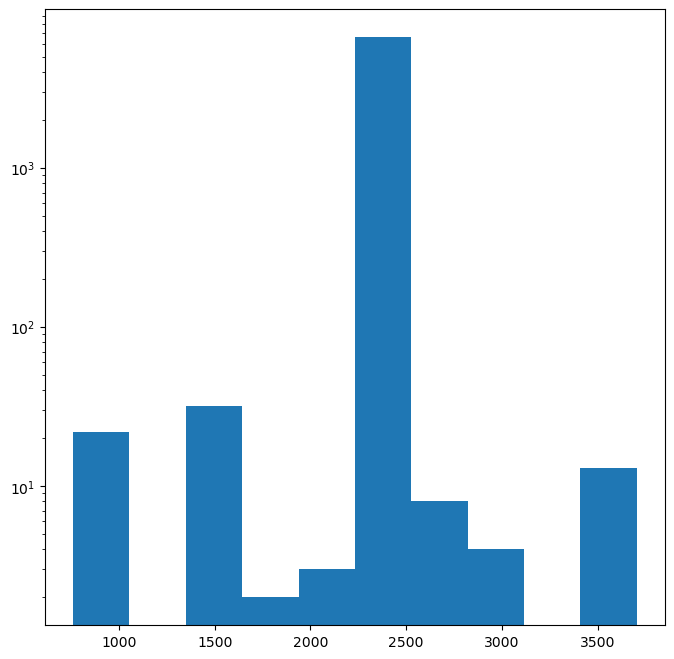

In [79]:
plt.hist(data=tempDF, x='Length', log=True)
plt.show()

In [80]:
goodAlus = []
tempDF_size = temprbDF3[(temprbDF3['Lengths']>2405) & (temprbDF3['Lengths']< 2415)].copy()

In [81]:
#87% of all DYZ2s
len(tempDF_size)/len(temprbDF3)

0.8576756676115173

In [82]:
#46% of the 87% NOT 46% of 100% of DYZ2s
for x, y in collections.Counter(tempDF_size['Lengths']).items():
    print("Length: "+str(x)+"\tTotal: "+str(y)+"\tPercentage: "+str(y/len(tempDF_size['Lengths'])))

Length: 2413	Total: 2853	Percentage: 0.49626021916855106
Length: 2412	Total: 690	Percentage: 0.12002087319533832
Length: 2411	Total: 722	Percentage: 0.12558705861889025
Length: 2410	Total: 274	Percentage: 0.04766046268916333
Length: 2406	Total: 544	Percentage: 0.09462515220038267
Length: 2408	Total: 192	Percentage: 0.03339711254131153
Length: 2407	Total: 82	Percentage: 0.0142633501478518
Length: 2409	Total: 265	Percentage: 0.04609497303878936
Length: 2414	Total: 127	Percentage: 0.02209079839972169


In [83]:
selectionDF = tempDF_size[tempDF_size['Lengths']==2413].reset_index().copy()
selectionDF

,RepeatBlock,index,Alu,Lengths,Group,Color,Block_Size
0,0,1,C_AluY_2857936-2858227,2413,[50692 415 24.7 3.9 3.4 chrY.21-24.01.AMPL7-PA...,#06D6A0,2000-2999
1,0,13,C_AluY_2886950-2887241,2413,[50728 408 25.3 3.3 3.8 chrY.21-24.01.AMPL7-PA...,#06D6A0,2000-2999
2,0,14,C_AluY_2889370-2889661,2413,[50731 408 25.9 3.1 3.6 chrY.21-24.01.AMPL7-PA...,#06D6A0,2000-2999
3,0,15,C_AluY_2891790-2892081,2413,[50734 409 25.5 3.2 3.7 chrY.21-24.01.AMPL7-PA...,#06D6A0,2000-2999
4,0,17,C_AluY_2896627-2896918,2413,[50740 406 25.6 3.2 3.7 chrY.21-24.01.AMPL7-PA...,#06D6A0,2000-2999
...,...,...,...,...,...,...,...
2848,38,6664,+_AluY_37144307-37144598,2413,[80028 4008 9.5 0.0 0.0 chrY.21-24.01.AMPL7-PA...,#06D6A0,2000-2999
2849,38,6669,C_AluY_37157306-37157597,2413,[80044 415 25.1 3.3 3.8 chrY.21-24.01.AMPL7-PA...,#06D6A0,2000-2999
2850,38,6670,C_AluY_37159726-37160017,2413,[80047 404 24.7 3.5 4.0 chrY.21-24.01.AMPL7-PA...,#06D6A0,2000-2999
2851,38,6675,C_AluY_37171814-37172105,2413,[80062 414 24.2 3.8 3.8 chrY.21-24.01.AMPL7-PA...,#06D6A0,2000-2999


In [73]:
goodRows=[]
for row in selectionDF.index:
    if "+_" in str(selectionDF.at[row,'Alu']):
        continue
    else:
        goodRows.append(row)
good_size_DF = selectionDF.loc[goodRows].copy()

In [ ]:
collections.Counter(good_size_DF['GuideTree'])

In [ ]:
shuffledDF = good_size_DF.sample(frac=0.3729).copy()

In [ ]:
#with open("/home/mark/Desktop/chromosome_y/pille_alus.txt", "a+") as file:
#    for row in shuffledDF.index:
#        Start = int(shuffledDF.at[row,'Group'][0].split(" ")[5].strip())
#        End = int(shuffledDF.at[row,'Group'][-1].split(" ")[6].strip())
#        alu = str(shuffledDF.at[row,'Alu'])
#        file.write(str(alu)+"\t"+str(Start)+"\t"+str(End)+"\n")
#    file.close()